## Observations and Insights 

In [2]:
# Capomulin Ramicane are better at treating the tumors due to the smaller volume of tumor at the end of the study, they also have smaller means and standard deviations 

# Both aformentioned drugs have the most number of measurements, which could skew the results since not every regimen has the same amount of measurements, I would reccomend having a consistent number of measurements across all regiemns 

# The numbers for the male and female rats are similar enough, that i do not see a strong enough correlation to draw a concuslion based on drug regimen quality based on gender.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df.head()
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mouse_number = combined_df["Mouse ID"].count()
mouse_number

1893

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID',])]
all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates("Mouse ID")
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_number = cleaned_df["Mouse ID"].count()
mouse_number

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df
# Using the aggregation method, produce the same summary statistics in a single line
agg_by = combined_df.groupby('Drug Regimen')
agg_df = agg_by.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Measurements per  Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

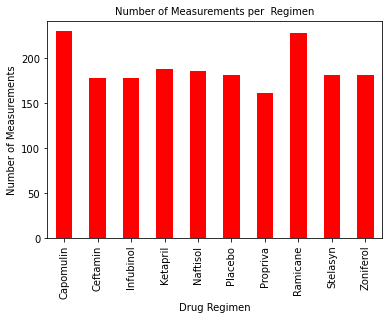

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugnum = combined_df.groupby(['Drug Regimen']).count()['Mouse ID']

pandas_bar = drugnum.plot.bar(width = 0.5, color = 'r')
pandas_bar.set_title("Number of Measurements per  Regimen",fontsize = 10)
pandas_bar.set_xlabel("Drug Regimen",fontsize = 10)
pandas_bar.set_ylabel("Number of Measurements",fontsize = 10)
pandas_bar

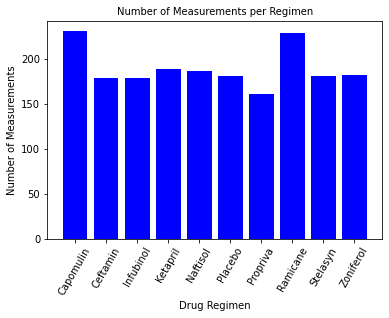

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(drugnum))
plt.bar(x_axis, drugnum, width = 0.8, color = 'b')

drugNames = [value for value in x_axis]
plt.xticks(drugNames, drugnum.index.values)
plt.xticks(rotation=60)
plt.title("Number of Measurements per Regimen",fontsize = 10)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Measurements",fontsize = 10)
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_by = combined_df.groupby(['Mouse ID', 'Sex'])
gender_df= pd.DataFrame(gender_by.size())
gender_df


,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


genderCount = gender_df.groupby(['Sex']).count()
genderdf = pd.DataFrame(genderCount)
genderdf.columns = ["Count"]
genderdf["Percentage"] = genderdf['Count']/genderdf['Count'].sum()
genderdf

,Count,Percentage
Sex,,
Female,124,0.497992
Male,125,0.502008


<AxesSubplot:title={'center':'Female vs. Male'}>

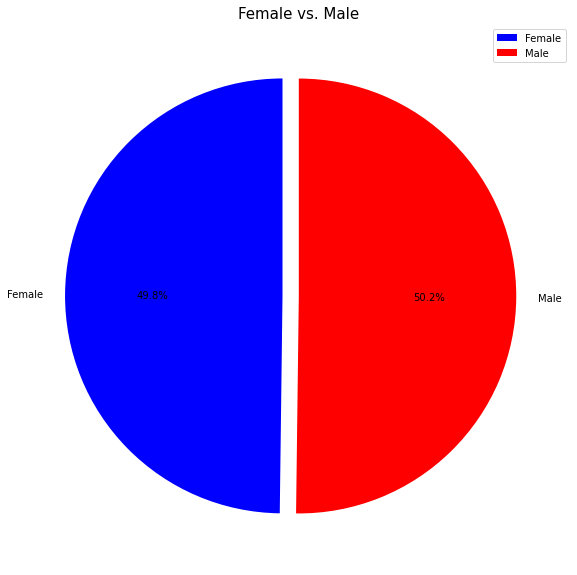

In [19]:
explode = (0.075,0)
colors = ('blue','red')
Pie_pandas = genderdf.plot.pie(y = 'Count', startangle=90, explode = explode, autopct = "%1.1f%%",colors=colors,figsize = (10,10))
Pie_pandas.set_title("Female vs. Male",fontsize = 15)
Pie_pandas.set_ylabel("")
Pie_pandas

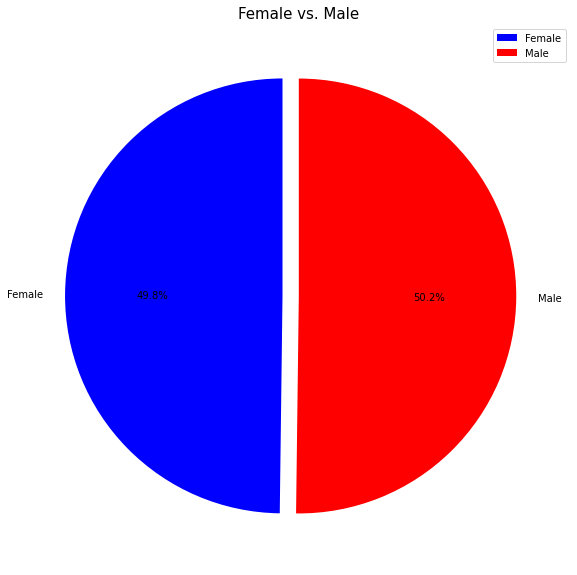

In [20]:
explode = (0.075,0)
colors = ('blue','red')
labels = ["Female", "Male"]
fig1,az1 = plt.subplots(figsize=(10,10))
plt.pie(genderdf['Count'], explode=explode, labels=labels,autopct="%1.1f%%",startangle=90,colors=colors)
plt.title("Female vs. Male",fontsize = 15)
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
maxTime_df = pd.DataFrame(combined_df.groupby('Mouse ID')['Timepoint'].max()).rename(columns={'Timepoint': "MaxTime"})
maxTime_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Tumor_df = pd.merge(combined_df, maxTime_df, on = 'Mouse ID')
Tumor_df

loc_df = Tumor_df.loc[Tumor_df['Timepoint'] == Tumor_df['MaxTime']]
loc_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MaxTime
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1862,z435,Propriva,Female,12,26,10,48.710661,0,10
1872,z581,Infubinol,Female,24,25,45,62.754451,3,45
1882,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
drugs

# Create empty list to fill with tumor vol data (for plotting)
tumorVol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in drugs: 
    sub_df = loc_df.loc[loc_df['Drug Regimen'] == regimen]
    finVol = sub_df.loc[sub_df['Timepoint'] == sub_df['MaxTime']]
    tumVol = finVol['Tumor Volume (mm3)']
    tumorVol_data.append(tumVol)
    
    quarts = tumVol.quantile([0.25,0.5,0.75])
    lowerq = quarts[0.25]
    upperq = quarts[0.75]
    IQR = upperq-lowerq
    lowerb = lowerq - (1.5*IQR)
    upperb = upperq + (1.5*IQR)
    print(f"The IQR for {regimen} is: {IQR}")
    print(f"     It's Upper Quartile is: {upperq}")
    print(f"     It's Lower Quartile is: {lowerq}")
    print(f"     It's Upper Bound is: {upperb}")
    print(f"     It's Lower Bound is: {lowerb}")
    
    upperOutlier = tumVol.loc[(finVol['Tumor Volume (mm3)'] > upperb)].count()
    lowerOutlier = tumVol.loc[(finVol['Tumor Volume (mm3)'] < lowerb)].count()
    Outliers = upperOutlier + lowerOutlier
    print(f"     Potential Outliers: {Outliers}")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The IQR for Capomulin is: 7.781863460000004
     It's Upper Quartile is: 40.1592203
     It's Lower Quartile is: 32.37735684
     It's Upper Bound is: 51.83201549
     It's Lower Bound is: 20.70456164999999
     Potential Outliers: 0
The IQR for Ramicane is: 9.098536719999998
     It's Upper Quartile is: 40.65900627
     It's Lower Quartile is: 31.56046955
     It's Upper Bound is: 54.30681135
     It's Lower Bound is: 17.912664470000003
     Potential Outliers: 0
The IQR for Infubinol is: 11.477135160000003
     It's Upper Quartile is: 65.52574285
     It's Lower Quartile is: 54.04860769
     It's Upper Bound is: 82.74144559000001
     It's Lower Bound is: 36.83290494999999
     Potential Outliers: 1
The IQR for Ceftamin is: 15.577752179999997
     It's Upper Quartile is: 64.29983003
     It's Lower Quartile is: 48.72207785
     It's Upper Bound is: 87.66645829999999
     It's Lower Bound is: 25.355449580000002
     Potential Outliers: 0


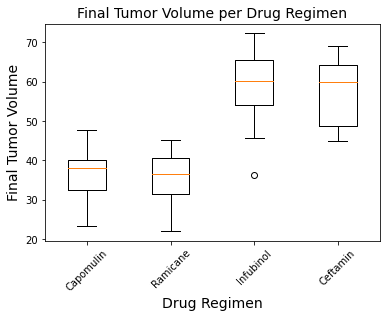

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorVol_data)
plt.title("Final Tumor Volume per Drug Regimen",fontsize = 14)
plt.ylabel("Final Tumor Volume",fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.xticks([1,2,3,4],['Capomulin', ' Ramicane', 'Infubinol', 'Ceftamin'])
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185=combined_df.loc[combined_df['Mouse ID'] == 's185']
s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


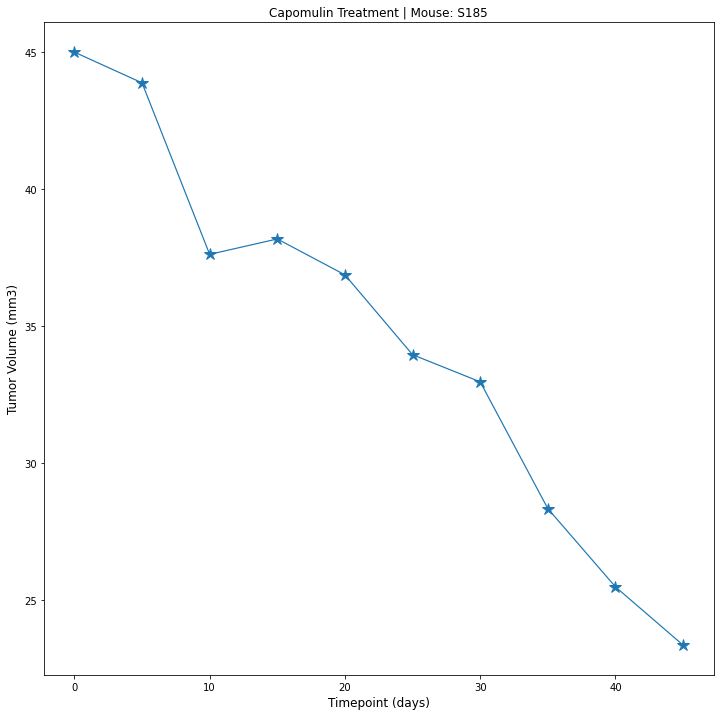

In [32]:
x_axis1 = s185['Timepoint']
y_axis1 = s185['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize = (12,12))

plt.plot(x_axis1, y_axis1,marker = '*', markersize = 12, linewidth = 1.2)
plt.title("Capomulin Treatment | Mouse: S185",fontsize = 12)
plt.xlabel("Timepoint (days)",fontsize = 12)
plt.ylabel("Tumor Volume (mm3)",fontsize = 12)
plt.show()

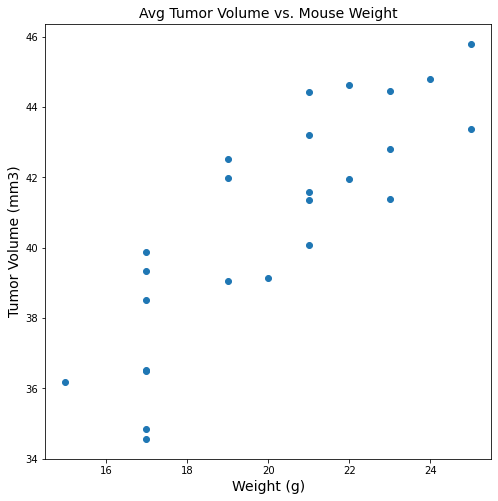

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
capomulin_df

avgs = capomulin_df.groupby(['Mouse ID']).mean()

x_axis2 = avgs['Weight (g)']
y_axis2 = avgs['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize = (8,8))

plt.scatter(x_axis2, y_axis2)
plt.title("Avg Tumor Volume vs. Mouse Weight",fontsize = 14)
plt.xlabel("Weight (g)",fontsize = 14)
plt.ylabel("Tumor Volume (mm3)",fontsize = 14)
plt.show()


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [33]:
corrco = st.pearsonr(x_axis2, y_axis2)
correlation = round(corrco[0],2)
correlation

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2, y_axis2)
regressValues = x_axis2 * slope + intercept

slope_r = round(slope,2)
intercept_r = round(intercept,2)
rvalue_r = round(rvalue,2)
stderr_r = round(stderr,2)

line = "y = " + str(slope_r) + "x + " + str(intercept_r)
print(f" The line equation is: {line}")

 The line equation is: y = 0.95x + 21.55
